In [1]:
import matplotlib.pyplot as plt
from train import *
import numpy as np

history, model, env = train(reward_target=255, realtime_render=True, batch_size=100, env_type=Environments.AtariBreakout, method=TrainMethod.DeepQLearning, n_episodes=2000)

2023-11-11 22:45:23.269556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 22:45:23.472426: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-11 22:45:23.472445: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-11 22:45:24.369913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-1

Episode 100/2000, average last 100 rewards 1.11
Episode 200/2000, average last 100 rewards 1.01
Episode 300/2000, average last 100 rewards 0.64
Episode 400/2000, average last 100 rewards 0.88
Episode 500/2000, average last 100 rewards 0.89
Episode 600/2000, average last 100 rewards 0.76


KeyboardInterrupt: 

In [21]:
import random

In [38]:
def export(history: list, env_type, model, train_method: TrainMethod, dir="./images", note=""):
    if len(history) == 0:
        raise IndexError("Train a model first!")

    nr = len([f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))])

    env = gym.make(env_type.env_name)
    state = env.reset()
    frames = []

    if train_method == TrainMethod.PolicyGradient:
        for t in range(500):
            im = Image.fromarray(env.render(mode='rgb_array'))
            frames.append(im)
            policy = model([tf.convert_to_tensor([state/env_type.state_bounds])])
            action = np.random.choice(env_type.n_actions, p=policy.numpy()[0])
            state, _, done, _ = env.step(action)
            if done:
                break
    elif train_method == TrainMethod.DeepQLearning:
        for t in range(500):
            im = Image.fromarray(env.render(mode='rgb_array'))
            frames.append(im)
            action_probs = model([tf.convert_to_tensor([state/env_type.state_bounds])])
            action = int(tf.argmax(action_probs[0]).numpy())
            state, _, done, _ = env.step(action)
            if done:
                break
    env.close()
    frames[1].save(dir + '/' + str(nr) + '_gym_' + str(env_type.env_name) + str(note) + '.gif',
                save_all=True, append_images=frames[2:], optimize=False, duration=40, loop=0)

In [39]:
export(history, Environments.CartPole, model, TrainMethod.DeepQLearning, note="_DeepQ_max")

[13.0, 20.0, 18.0, 25.0, 30.0, 11.0, 10.0, 10.0, 15.0, 50.0, 22.0, 19.0, 31.0, 42.0, 12.0, 16.0, 37.0, 17.0, 17.0, 39.0, 12.0, 24.0, 14.0, 25.0, 13.0, 12.0, 17.0, 19.0, 17.0, 11.0, 14.0, 11.0, 15.0, 42.0, 14.0, 16.0, 9.0, 40.0, 37.0, 11.0, 14.0, 11.0, 12.0, 34.0, 16.0, 17.0, 16.0, 11.0, 10.0, 15.0, 16.0, 11.0, 12.0, 11.0, 8.0, 9.0, 15.0, 11.0, 13.0, 12.0, 10.0, 11.0, 13.0, 17.0, 17.0, 14.0, 17.0, 14.0, 18.0, 9.0, 12.0, 19.0, 19.0, 11.0, 15.0, 11.0, 9.0, 11.0, 36.0, 19.0, 10.0, 12.0, 16.0, 19.0, 16.0, 8.0, 12.0, 13.0, 11.0, 14.0, 13.0, 10.0, 10.0, 9.0, 10.0, 9.0, 12.0, 14.0, 15.0, 12.0, 20.0, 13.0, 10.0, 10.0, 10.0, 13.0, 14.0, 12.0, 8.0, 14.0, 12.0, 10.0, 12.0, 10.0, 9.0, 11.0, 12.0, 9.0, 14.0, 10.0, 11.0, 19.0, 9.0, 13.0, 11.0, 9.0, 9.0, 11.0, 10.0, 9.0, 10.0, 12.0, 13.0, 15.0, 14.0, 9.0, 8.0, 10.0, 10.0, 10.0, 10.0, 9.0, 13.0, 10.0, 12.0, 13.0, 12.0, 12.0, 9.0, 10.0, 13.0, 16.0, 9.0, 12.0, 10.0, 9.0, 9.0, 9.0, 10.0, 8.0, 12.0, 14.0, 9.0, 17.0, 10.0, 13.0, 12.0, 11.0, 12.0, 11.0, 13.0

/home/ubuntu/anaconda3/envs/venv/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


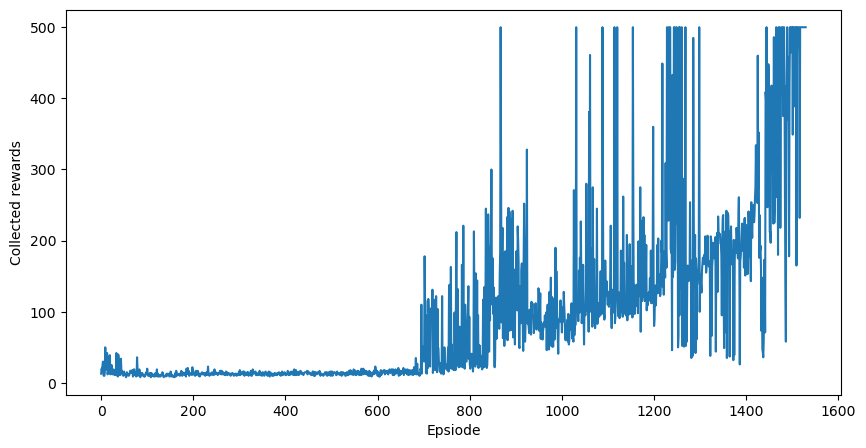

In [4]:
plt.figure(figsize=(10,5))
plt.plot(history)
plt.xlabel('Epsiode')
plt.ylabel('Collected rewards')
plt.show()